In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 
import os

### 1. merge(im1, im2, tp, ptOut): taken as input two images (im1, im2) the method returns a new image consisting of half im1 and half im2. The merge occurs according to one of the following types defined by tp (this value is chosen by the operator before calling the merge method):


In [4]:
def merge(im1, im2, ptOut, tp=0):
    tp = int(input('enter the type of merge: '))
    im_name = (input('Enter the img name: ') + '.png')
    ht1 = im1.shape[0]
    wdt1 = im1.shape[1]
    ht2 = im2.shape[0]
    wdt2 = im2.shape[1]
    if ht1 != ht2 or wdt1 != wdt2:
        im2 = cv.resize(im2, (wdt1, ht1), interpolation=cv.INTER_AREA)
    newimg = np.zeros((wdt1,ht1))

    if tp == 0:
        th = int(wdt1/2)
        newimg[:,:th] = im1[:,:th]
        newimg[:,th:] = im2[:,th:]

    elif tp == 1:
        th = int(ht1/2)
        newimg[th:,:] = im2[th:,:]
        newimg[:th,:] = im1[:th,:]

    elif tp == 2:
        th = int(ht1/2)
        newimg[th:,:] = im1[th:,:]
        newimg[:th,:] = im2[:th,:]

    elif tp == 3:
        th = int(wdt1/2)
        newimg[:,:th] = im2[:,:th]
        newimg[:,th:] = im1[:,th:]
    

    #cv.imwrite(im_name, newimg)
    plt.imshow(newimg, cmap= 'gray')
    cdir = os.getcwd()
    os.chdir(ptOut)
    cv.imwrite(im_name, newimg)
    os.chdir(cdir)
    return newimg
                


In [ ]:
img = cv.imread('lena.png', cv.IMREAD_GRAYSCALE)
test = cv.imread('checkerboard_84x84.jpg', cv.IMREAD_GRAYSCALE)
merge(img, test, r'C:\Users\Utente\Documents\Data Science\Data-Science-Stuff\Multimedia Data Modelling')

### 2. conv(im, coordinates, kernel, ptOut): the method returns a ne w image to which a convolution operation is  applied only in the region defined in coordinates. In addition, the method, will save the image in a predefined  directory (ptOut) with a new name chosen specifically by the user (the operation of putting the name must be  provided within the method). 

In [6]:
def conv(im, size, kernel, ptOut):
    h, w = im.shape
    padding = kernel.shape[0]//2
    new_img = np.zeros((w+2*padding,h+2*padding))
    nih, niw = new_img.shape
    new_img[0+padding:niw-padding,0+padding:nih-padding] = im

    x = int(input('enter a x coordinate: '))
    y = int(input('enter a y coordinate: '))
    name = (input('Enter a name:')+'.png')

    size = int(size/2) 

    h1 = y - size
    h2 = y + size
    w1 = x - size
    w2 = x + size

    for i in range(w1,w2+1, kernel.shape[0]):
        for j in range(h1,h2+1, kernel.shape[0]):
            new_img[i-padding:i+padding+1,j-padding:j+padding+1] = new_img[i-padding:i+padding+1,j-padding:j+padding+1] * kernel
            
    new_img = new_img[0+padding:niw-padding,0+padding:nih-padding]        
    cdir = os.getcwd()
    os.chdir(ptOut)
    cv.imwrite(name, new_img)
    os.chdir(cdir)
    return new_img


In [7]:
kn = [[1,0,0],[0,1,0],[0,0,1]]
kn = np.array(kn)

(512, 512)

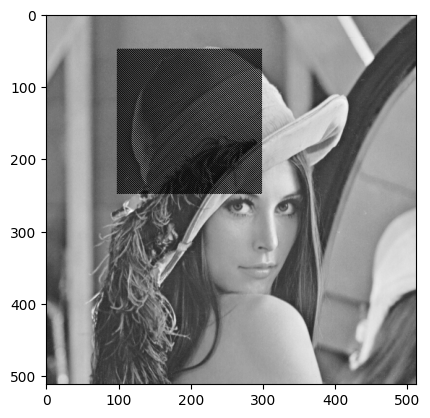

In [17]:
test = conv(img, 200, kn, r'C:\Users\Utente\Documents\Data Science\Data-Science-Stuff\Multimedia Data Modelling')
plt.imshow(test, cmap='gray')
test.shape

### 3. blocks(im): the method divides the image into non-overlapping blocks of size 8x8. At each block calculate the histogram and display it.

In [19]:
def hst(im):
    im_hist = plt.hist(im, bins=range(0,256))
    plt.title('hist')
    plt.show()

    return im_hist

In [22]:
def blocks(im):
    for i in range(0, im.shape[1]+1, 8):
        for j in range(0, im.shape[0]+1, 8):
            t = im[i:i+8,j:j+8]
            hst(t)

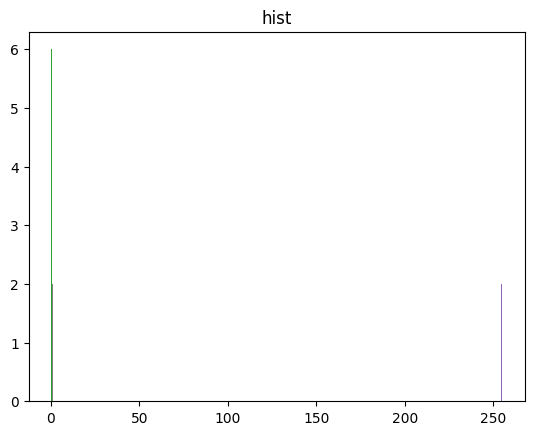

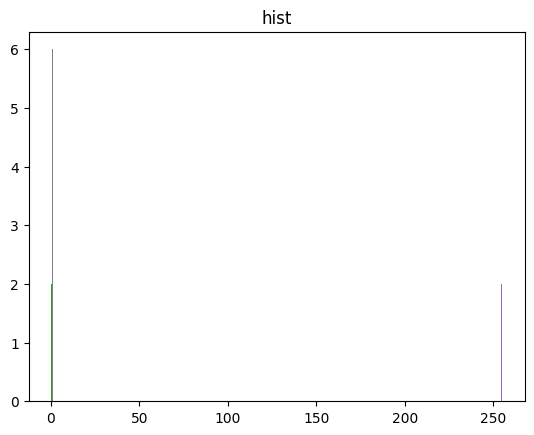

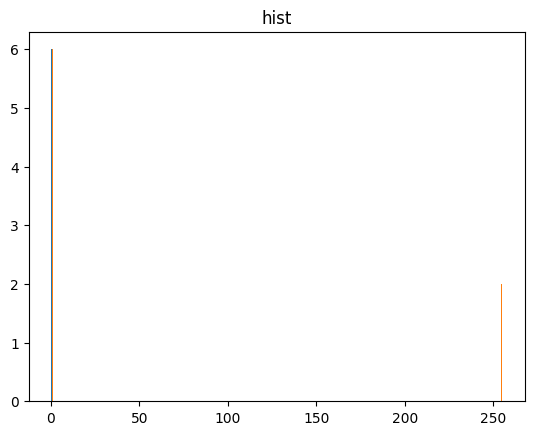

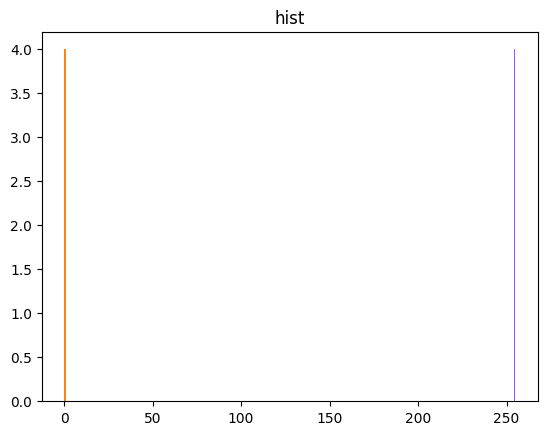

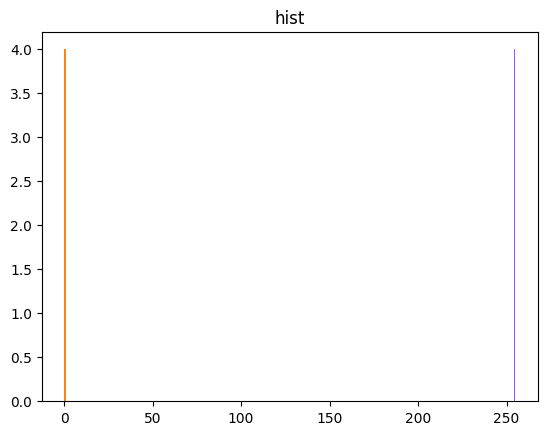

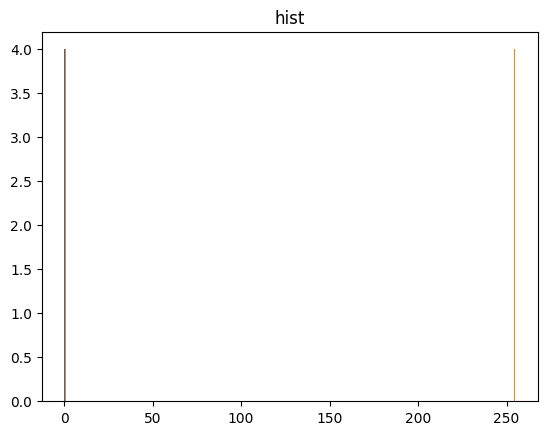

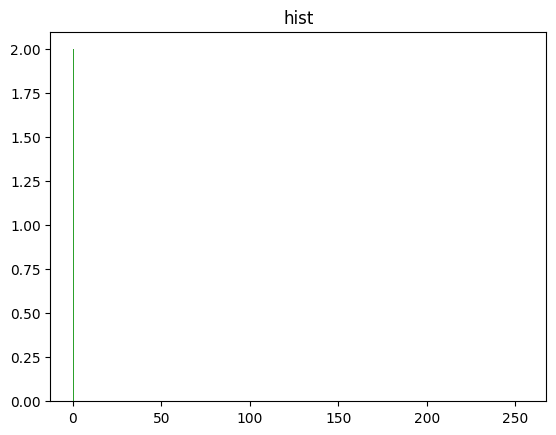

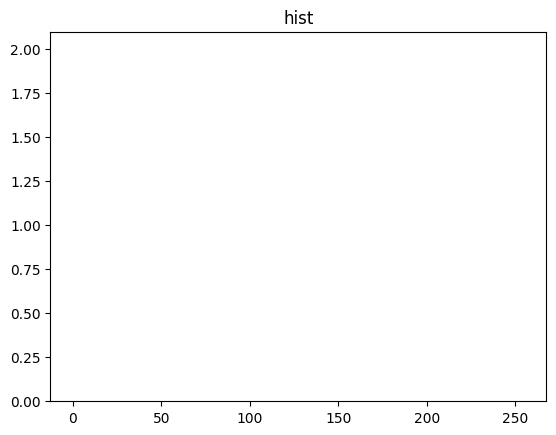

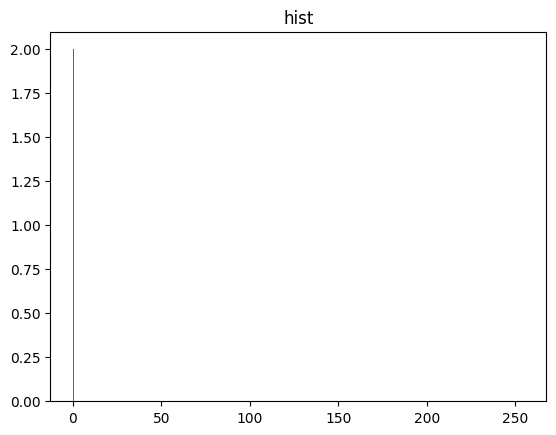

In [23]:
z = cv.imread('checkerboard_18x18.png', 0)
blocks(z)